In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'e0c83409-a135-4959-8ead-2413a5cb3a27',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-07-16T13:30:59.608Z', 'error_code': 0, 'error_message': None, 'elapsed': 16, 'credit_count': 1, 'notice': None, 'total_count': 10157}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10342, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [17]:
type(data)

dict

In [9]:
import pandas as pd

#This causes you to view the maximum columns/rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
#this will standardise the data in a more readable format

df = pd.json_normalize(data['data'])
#df['timestamp'] = pd.to_datetime('now')  This is depreciated

df['timestamp'] = pd.Timestamp('now')


df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10342,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.943076e+07,1.943076e+07,False,NaN,1,NaN,NaN,None,2023-07-16T13:28:00.000Z,30296.534058,7.734111e+09,-54.5204,-0.082820,-0.109467,-0.059698,18.443884,13.395076,3.254325,5.886847e+11,48.4402,6.362272e+11,None,2023-07-16T13:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-16 14:31:07.579739
1,1027,Ethereum,ETH,ethereum,7124,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202002e+08,1.202002e+08,True,NaN,2,NaN,NaN,None,2023-07-16T13:28:00.000Z,1930.985868,4.090548e+09,-51.6103,-0.148806,-0.334767,3.007877,15.640013,7.397550,-6.416039,2.321049e+11,19.0981,2.321049e+11,None,2023-07-16T13:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-16 14:31:07.579739
2,825,Tether,USDT,tether,56973,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.363837e+10,8.671579e+10,True,NaN,3,NaN,NaN,None,2023-07-16T13:28:00.000Z,1.000422,1.640613e+10,-49.7433,-0.023915,0.003647,0.020493,0.151789,0.031236,0.008258,8.367363e+10,6.8852,8.675234e+10,None,2023-07-16T13:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-07-16 14:31:07.579739
3,52,XRP,XRP,xrp,993,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.254409e+10,9.998862e+10,False,NaN,4,NaN,NaN,None,2023-07-16T13:28:00.000Z,0.745115,2.935604e+09,-44.2402,0.035396,2.575871,58.651387,60.220000,66.940693,45.945620,3.915137e+10,3.2215,7.451145e+10,None,2023-07-16T13:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-16 14:31:07.579739
4,1839,BNB,BNB,bnb,1506,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558488e+08,1.558488e+08,False,NaN,5,NaN,NaN,None,2023-07-16T13:28:00.000Z,248.549714,3.988614e+08,-34.2257,-0.606954,-0.743759,5.734001,5.733058,-19.603784,-27.127921,3.873616e+10,3.1873,3.873616e+10,None,2023-07-16T13:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-16 14:31:07.579739
5,3408,USD Coin,USDC,usd-coin,13332,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.728103e+10,2.728103e+10,False,NaN,6,NaN,NaN,None,2023-07-16T13:28:00.000Z,1.000005,1.955375e+09,-49.6158,-0.029517,-0.013831,-0.002762,0.038466,0.006717,0.030608,2.728116e+10,2.2448,2.728116e+10,None,2023-07-16T13:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-07-16 14:31:07.579739
6,5426,Solana,SOL,solana,486,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.026838e+08,5.526209e+08,True,NaN,7,NaN,NaN,None,2023-07-16T13:28:00.000Z,28.056932,8.704050e+08,-45.5519,-0.155504,-1.244275,29.177974,91.615014,36.122774,11.875201,1.129807e+10,0.9296,1.550485e+10,None,2023-07-16T13:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-16 14:31:07.579739
7,2010,Cardano,ADA,cardano,871,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.497646e+10,3.598361e+10,False,NaN,8,NaN,NaN,None,2023-07-16T13:28:00.000Z,0.319715,2.552980e+08,-46.1479,-0.798090,-4.140967,11.247112,24.112966,-13.085228,-26.782692,1.118250e+10,0.9201,1.438718e+10,None,2023-07-16T13:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-16 14:31:07.579739
8,74,Dogecoin,DOGE,dogecoin,743,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",

In [10]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'e0c83409-a135-4959-8ead-2413a5cb3a27',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
        df = pd.json_normalize(data['data'])
        df['timestamp'] = pd.Timestamp('now')
        df
        
        if not os.path.isfile(r'C:\Desktop\Data analysis\Python Scripts\API.csv'):
            df.to_csv(r'C:\Desktop\Data analysis\Python Scripts\API.csv', header='column_names')
        else:
            df.to_csv(r'C:\Desktop\Data analysis\Python Scripts\API.csv', mode = 'a', header=False)
            

In [11]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed successfully')
    sleep(60)
exit()
    

{'status': {'timestamp': '2023-07-16T13:45:54.910Z', 'error_code': 0, 'error_message': None, 'elapsed': 32, 'credit_count': 1, 'notice': None, 'total_count': 10157}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10342, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

{'status': {'timestamp': '2023-07-16T13:46:55.224Z', 'error_code': 0, 'error_message': None, 'elapsed': 31, 'credit_count': 1, 'notice': None, 'total_count': 10157}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10342, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

{'status': {'timestamp': '2023-07-16T13:47:55.478Z', 'error_code': 0, 'error_message': None, 'elapsed': 31, 'credit_count': 1, 'notice': None, 'total_count': 10157}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10342, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

{'status': {'timestamp': '2023-07-16T13:48:55.885Z', 'error_code': 0, 'error_message': None, 'elapsed': 132, 'credit_count': 1, 'notice': None, 'total_count': 10157}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10342, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'pa

{'status': {'timestamp': '2023-07-16T13:49:56.204Z', 'error_code': 0, 'error_message': None, 'elapsed': 28, 'credit_count': 1, 'notice': None, 'total_count': 10157}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10342, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

KeyboardInterrupt: 

In [ ]:
df3 = pd.read_csv(r'C:\Desktop\Data analysis\Python Scripts\API.csv')
df3

In [8]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10342,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.943076e+07,1.943076e+07,False,NaN,1,NaN,NaN,None,2023-07-16T13:28:00.000Z,30296.534058,7.734111e+09,-54.5204,-0.082820,-0.109467,-0.059698,18.443884,13.395076,3.254325,5.886847e+11,48.4402,6.362272e+11,None,2023-07-16T13:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-16 14:31:07.579739
1,1027,Ethereum,ETH,ethereum,7124,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202002e+08,1.202002e+08,True,NaN,2,NaN,NaN,None,2023-07-16T13:28:00.000Z,1930.985868,4.090548e+09,-51.6103,-0.148806,-0.334767,3.007877,15.640013,7.397550,-6.416039,2.321049e+11,19.0981,2.321049e+11,None,2023-07-16T13:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-16 14:31:07.579739
2,825,Tether,USDT,tether,56973,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.363837e+10,8.671579e+10,True,NaN,3,NaN,NaN,None,2023-07-16T13:28:00.000Z,1.000422,1.640613e+10,-49.7433,-0.023915,0.003647,0.020493,0.151789,0.031236,0.008258,8.367363e+10,6.8852,8.675234e+10,None,2023-07-16T13:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-07-16 14:31:07.579739
3,52,XRP,XRP,xrp,993,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.254409e+10,9.998862e+10,False,NaN,4,NaN,NaN,None,2023-07-16T13:28:00.000Z,0.745115,2.935604e+09,-44.2402,0.035396,2.575871,58.651387,60.220000,66.940693,45.945620,3.915137e+10,3.2215,7.451145e+10,None,2023-07-16T13:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-16 14:31:07.579739
4,1839,BNB,BNB,bnb,1506,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558488e+08,1.558488e+08,False,NaN,5,NaN,NaN,None,2023-07-16T13:28:00.000Z,248.549714,3.988614e+08,-34.2257,-0.606954,-0.743759,5.734001,5.733058,-19.603784,-27.127921,3.873616e+10,3.1873,3.873616e+10,None,2023-07-16T13:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-16 14:31:07.579739
5,3408,USD Coin,USDC,usd-coin,13332,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.728103e+10,2.728103e+10,False,NaN,6,NaN,NaN,None,2023-07-16T13:28:00.000Z,1.000005,1.955375e+09,-49.6158,-0.029517,-0.013831,-0.002762,0.038466,0.006717,0.030608,2.728116e+10,2.2448,2.728116e+10,None,2023-07-16T13:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-07-16 14:31:07.579739
6,5426,Solana,SOL,solana,486,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.026838e+08,5.526209e+08,True,NaN,7,NaN,NaN,None,2023-07-16T13:28:00.000Z,28.056932,8.704050e+08,-45.5519,-0.155504,-1.244275,29.177974,91.615014,36.122774,11.875201,1.129807e+10,0.9296,1.550485e+10,None,2023-07-16T13:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-16 14:31:07.579739
7,2010,Cardano,ADA,cardano,871,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.497646e+10,3.598361e+10,False,NaN,8,NaN,NaN,None,2023-07-16T13:28:00.000Z,0.319715,2.552980e+08,-46.1479,-0.798090,-4.140967,11.247112,24.112966,-13.085228,-26.782692,1.118250e+10,0.9201,1.438718e+10,None,2023-07-16T13:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-16 14:31:07.579739
8,74,Dogecoin,DOGE,dogecoin,743,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",

In [17]:
pd.set_option('display.float_format', lambda x: '%.5f' %x)

In [18]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10342,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19430762.00000,19430762.00000,False,NaN,1,NaN,NaN,None,2023-07-16T13:28:00.000Z,30296.53406,7734110787.21185,-54.52040,-0.08282,-0.10947,-0.05970,18.44388,13.39508,3.25432,588684742699.34509,48.44020,636227215210.92004,None,2023-07-16T13:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-16 14:31:07.579739
1,1027,Ethereum,ETH,ethereum,7124,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120200189.25430,120200189.25430,True,NaN,2,NaN,NaN,None,2023-07-16T13:28:00.000Z,1930.98587,4090548000.91226,-51.61030,-0.14881,-0.33477,3.00788,15.64001,7.39755,-6.41604,232104866778.79559,19.09810,232104866778.79999,None,2023-07-16T13:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-16 14:31:07.579739
2,825,Tether,USDT,tether,56973,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83638374850.95830,86715788906.06107,True,NaN,3,NaN,NaN,None,2023-07-16T13:28:00.000Z,1.00042,16406125614.20714,-49.74330,-0.02391,0.00365,0.02049,0.15179,0.03124,0.00826,83673632583.83740,6.88520,86752343921.95000,None,2023-07-16T13:28:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-07-16 14:31:07.579739
3,52,XRP,XRP,xrp,993,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,52544091958.00000,99988621362.00000,False,NaN,4,NaN,NaN,None,2023-07-16T13:28:00.000Z,0.74511,2935603658.22628,-44.24020,0.03540,2.57587,58.65139,60.22000,66.94069,45.94562,39151367380.60555,3.22150,74511454897.53999,None,2023-07-16T13:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-16 14:31:07.579739
4,1839,BNB,BNB,bnb,1506,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,155848752.56299,155848752.56299,False,NaN,5,NaN,NaN,None,2023-07-16T13:28:00.000Z,248.54971,398861420.57094,-34.22570,-0.60695,-0.74376,5.73400,5.73306,-19.60378,-27.12792,38736162829.32232,3.18730,38736162829.32000,None,2023-07-16T13:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-16 14:31:07.579739
5,3408,USD Coin,USDC,usd-coin,13332,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,27281025801.03943,27281025801.03943,False,NaN,6,NaN,NaN,None,2023-07-16T13:28:00.000Z,1.00000,1955374634.39495,-49.61580,-0.02952,-0.01383,-0.00276,0.03847,0.00672,0.03061,27281157082.73880,2.24480,27281157082.74000,None,2023-07-16T13:28:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-07-16 14:31:07.579739
6,5426,Solana,SOL,solana,486,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,402683840.78074,552620927.68267,True,NaN,7,NaN,NaN,None,2023-07-16T13:28:00.000Z,28.05693,870404960.39352,-45.55190,-0.15550,-1.24428,29.17797,91.61501,36.12277,11.87520,11298073185.39324,0.92960,15504847854.42000,None,2023-07-16T13:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-16 14:31:07.579739
7,2010,Cardano,ADA,cardano,871,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34976462007.73700,35983607755.52800,False,NaN,8,NaN,NaN,None,2023-07-16T13:28:00.000Z,0.31972,255297998.89519,-46.14790,-0.79809,-4.14097,11.24711,24.11297,-13.08523,-26.78269,11182503684.22377,0.92010,14387180317.97000,None,2023-07-16T13:28:00.000Z

In [21]:
df4 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()

df4

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.08282,-0.10947,-0.05970,18.44388,13.39508,3.25432
Ethereum,-0.14881,-0.33477,3.00788,15.64001,7.39755,-6.41604
Tether,-0.02391,0.00365,0.02049,0.15179,0.03124,0.00826
XRP,0.03540,2.57587,58.65139,60.22000,66.94069,45.94562
BNB,-0.60695,-0.74376,5.73400,5.73306,-19.60378,-27.12792
USD Coin,-0.02952,-0.01383,-0.00276,0.03847,0.00672,0.03061
Solana,-0.15550,-1.24428,29.17797,91.61501,36.12277,11.87520
Cardano,-0.79809,-4.14097,11.24711,24.11297,-13.08523,-26.78269
Dogecoin,-0.60933,-1.93662,7.77643,15.91880,-3.17230,-21.91715


In [23]:
df5 = df4.stack()
df5

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.08282
              quote.USD.percent_change_24h    -0.10947
              quote.USD.percent_change_7d     -0.05970
              quote.USD.percent_change_30d    18.44388
              quote.USD.percent_change_60d    13.39508
              quote.USD.percent_change_90d     3.25432
Ethereum      quote.USD.percent_change_1h     -0.14881
              quote.USD.percent_change_24h    -0.33477
              quote.USD.percent_change_7d      3.00788
              quote.USD.percent_change_30d    15.64001
              quote.USD.percent_change_60d     7.39755
              quote.USD.percent_change_90d    -6.41604
Tether        quote.USD.percent_change_1h     -0.02391
              quote.USD.percent_change_24h     0.00365
              quote.USD.percent_change_7d      0.02049
              quote.USD.percent_change_30d     0.15179
              quote.USD.percent_change_60d     0.03124
              quote.US

In [25]:
type(df5)

pandas.core.series.Series

In [26]:
df6 = df5.to_frame(name='values')
df6

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.08282
             quote.USD.percent_change_24h  -0.10947
             quote.USD.percent_change_7d   -0.05970
             quote.USD.percent_change_30d  18.44388
             quote.USD.percent_change_60d  13.39508
             quote.USD.percent_change_90d   3.25432
Ethereum     quote.USD.percent_change_1h   -0.14881
             quote.USD.percent_change_24h  -0.33477
             quote.USD.percent_change_7d    3.00788
             quote.USD.percent_change_30d  15.64001
             quote.USD.percent_change_60d   7.39755
             quote.USD.percent_change_90d  -6.41604
Tether       quote.USD.percent_change_1h   -0.02391
             quote.USD.percent_change_24h   0.00365
             quote.USD.percent_change_7d    0.02049
             quote.USD.percent_change_30d   0.15179
             quote.USD.percent_change_60d   0.03124
             quote.USD.percent_change_90d   0.00826
XRP          quote.USD.percent_change_1h    0.03540
             quote.USD.percent_change_24h   2.57587
             quote.USD.percent_change_7d   58.65139
             quote.USD.percent_change_30d  60.22000
             quote.USD.percent_change_60d  66.94069
             quote.USD.percent_change_90d  45.94562
BNB          quote.USD.percent_change_1h   -0.60695
             quote.USD.percent_change_24h  -0.74376
             quote.USD.percent_change_7d    5.73400
             quote.USD.percent_change_30d   5.73306
             quote.USD.percent_change_60d -19.60378
             quote.USD.percent_change_90d -27.12792
USD Coin     quote.USD.percent_change_1h   -0.02952
             quote.USD.percent_change_24h  -0.01383
             quote.USD.percent_change_7d   -0.00276
             quote.USD.percent_change_30d   0.03847
             quote.USD.percent_change_60d   0.00672
             quote.USD.percent_change_90d   0.03061
Solana       quote.USD.percent_change_1h   -0.15550
             quote.USD.percent_change_24h  -1.24428
             quote.USD.percent_change_7d   29.17797
             quote.USD.percent_change_30d  91.61501
             quote.USD.percent_change_60d  36.12277
             quote.USD.percent_change_90d  11.87520
Cardano      quote.USD.percent_change_1h   -0.79809
             quote.USD.percent_change_24h  -4.14097
             quote.USD.percent_change_7d   11.24711
             quote.USD.percent_change_30d  24.11297
             quote.USD.percent_change_60d -13.08523
             quote.USD.percent_change_90d -26.78269
Dogecoin     quote.USD.percent_change_1h   -0.60933
             quote.USD.percent_change_24h  -1.93662
             quote.USD.percent_change_7d    7.77643
             quote.USD.percent_change_30d  15.91880
             quote.USD.percent_change_60d  -3.17230
             quote.USD.percent_change_90d -21.91715
Polygon      quote.USD.percent_change_1h   -0.39070
             quote.USD.percent_change_24h  -2.92878
             quote.USD.percent_change_7d   13.46842
             quote.USD.percent_change_30d  38.04528
             quote.USD.percent_change_60d  -8.62815
             quote.USD.percent_change_90d -32.32688
TRON         quote.USD.percent_change_1h   -0.19722
             quote.USD.percent_change_24h  -1.16367
             quote.USD.percent_change_7d    0.67431
             quote.USD.percent_change_30d  15.10297
             quote.USD.percent_change_60d  13.18107
             quote.USD.percent_change_90d  21.40385
Litecoin     quote.USD.percent_change_1h   -0.23628
             quote.USD.percent_change_24h  -0.27840
             quote.USD.percent_change_7d   -2.42501
             quote.USD.percent_change_30d  26.03260
             quote.USD.percent_change_60d   2.12767
             quote.USD.percent_change_90d  -4.03818
Polkadot     quote.USD.percent_change_1h   -0.22409
             quote.USD.percent_change_24h  -1.93498
             quote.USD.percent_change_7d    5.01184
             quote.USD.percent_change_30d

In [27]:
type(df6)

pandas.core.frame.DataFrame

In [28]:
df6.count()

values    90
dtype: int64

In [33]:
index = pd.Index(range(90))

df7 = df6.reset_index()
df7

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.08282
1,Bitcoin,quote.USD.percent_change_24h,-0.10947
2,Bitcoin,quote.USD.percent_change_7d,-0.05970
3,Bitcoin,quote.USD.percent_change_30d,18.44388
4,Bitcoin,quote.USD.percent_change_60d,13.39508
5,Bitcoin,quote.USD.percent_change_90d,3.25432
6,Ethereum,quote.USD.percent_change_1h,-0.14881
7,Ethereum,quote.USD.percent_change_24h,-0.33477
8,Ethereum,quote.USD.percent_change_7d,3.00788
9,Ethereum,quote.USD.percent_change_30d,15.64001


In [36]:
df8 = df7.rename(columns={'level_1':'percent_change'})
df8

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.08282
1,Bitcoin,quote.USD.percent_change_24h,-0.10947
2,Bitcoin,quote.USD.percent_change_7d,-0.05970
3,Bitcoin,quote.USD.percent_change_30d,18.44388
4,Bitcoin,quote.USD.percent_change_60d,13.39508
5,Bitcoin,quote.USD.percent_change_90d,3.25432
6,Ethereum,quote.USD.percent_change_1h,-0.14881
7,Ethereum,quote.USD.percent_change_24h,-0.33477
8,Ethereum,quote.USD.percent_change_7d,3.00788
9,Ethereum,quote.USD.percent_change_30d,15.64001


In [41]:
#To shorten the column names so they are more readable for diagrams
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df8

,name,percent_change,values
0,Bitcoin,1h,-0.08282
1,Bitcoin,24h,-0.10947
2,Bitcoin,7d,-0.05970
3,Bitcoin,30d,18.44388
4,Bitcoin,60d,13.39508
5,Bitcoin,90d,3.25432
6,Ethereum,1h,-0.14881
7,Ethereum,24h,-0.33477
8,Ethereum,7d,3.00788
9,Ethereum,30d,15.64001


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

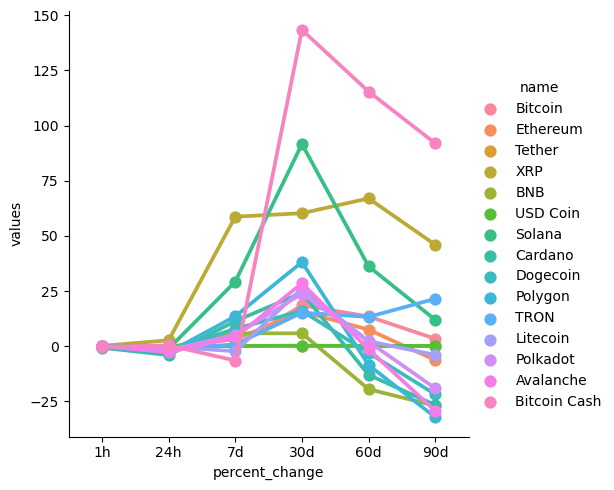

In [42]:
sns.catplot(x='percent_change', y='values', hue='name', data= df8, kind='point')

In [48]:
df9 = df[['name','quote.USD.price','timestamp']]
df9 = df9.query("name == 'Bitcoin'")
df9

,name,quote.USD.price,timestamp
0,Bitcoin,30296.53406,2023-07-16 14:31:07.579739


In [1]:
#sns.set_theme(style="darkgrid")
#sns.lineplot(x='timestamp', y='quote.USD.price', data=df9)

#Here you can see which graph visualisation you prefer